In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# 1. Load the processed data from Notebook 1
df = pd.read_parquet('processed_customer_support_data.parquet')

# 2. Define our features (X) and target (y)
X = df['Cleaned_Description']
y = df['Category']

# 3. Perform the train-test split
# We'll use an 80/20 split and stratify to maintain class distribution.
# random_state ensures we get the same split every time we run the code.
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

In [2]:
# 4. Verify the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (6775,)
Shape of X_test: (1694,)
Shape of y_train: (6775,)
Shape of y_test: (1694,)


In [3]:
# Let's also verify the distribution in the training and testing sets
print("\nDistribution in original dataset:")
print(y.value_counts(normalize=True))
print("\nDistribution in training set:")
print(y_train.value_counts(normalize=True))
print("\nDistribution in testing set:")
print(y_test.value_counts(normalize=True))


Distribution in original dataset:
Category
Billing            0.564175
Technical Issue    0.194592
General Query      0.181131
Account Access     0.060102
Name: proportion, dtype: float64

Distribution in training set:
Category
Billing            0.564133
Technical Issue    0.194686
General Query      0.181107
Account Access     0.060074
Name: proportion, dtype: float64

Distribution in testing set:
Category
Billing            0.564345
Technical Issue    0.194215
General Query      0.181228
Account Access     0.060213
Name: proportion, dtype: float64


In [4]:
# 1. Vectorize the text data using CountVectorizer
print("Step 1: Vectorizing the text data...")
vectorizer = CountVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test) # Use transform only, no fitting on test data
print("Vectorization complete.")
print("Vocabulary size:", len(vectorizer.get_feature_names_out()))
print("Shape of X_train_vectors:", X_train_vectors.shape)

Step 1: Vectorizing the text data...
Vectorization complete.
Vocabulary size: 5312
Shape of X_train_vectors: (6775, 5312)


In [5]:
# 2. Train the Logistic Regression model
print("\nStep 2: Training the Logistic Regression model...")
log_reg = LogisticRegression(max_iter=1000) # Increased max_iter for convergence
log_reg.fit(X_train_vectors, y_train)
print("Model training complete.")


Step 2: Training the Logistic Regression model...
Model training complete.


In [6]:
# 3. Make predictions on the test data
print("\nStep 3: Making predictions on the test data...")
y_pred = log_reg.predict(X_test_vectors)
print("Prediction complete.")


Step 3: Making predictions on the test data...
Prediction complete.


In [7]:
# 4. Evaluate the model
print("\nStep 4: Evaluating the model...")

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report (Precision, Recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Step 4: Evaluating the model...
Accuracy: 0.5077

Classification Report:
                 precision    recall  f1-score   support

 Account Access       0.07      0.01      0.02       102
        Billing       0.57      0.83      0.68       956
  General Query       0.20      0.08      0.12       307
Technical Issue       0.24      0.11      0.15       329

       accuracy                           0.51      1694
      macro avg       0.27      0.26      0.24      1694
   weighted avg       0.41      0.51      0.43      1694




Confusion Matrix:


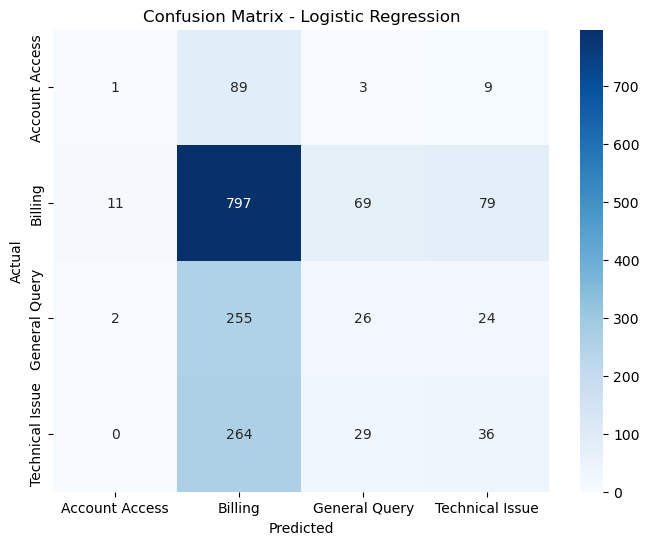

In [8]:
# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [9]:
# 1. Vectorize the text data using TfidfVectorizer
print("Step 1: Vectorizing the text data with TF-IDF...")
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
print("Vectorization complete.")
print("Vocabulary size:", len(tfidf_vectorizer.get_feature_names_out()))

Step 1: Vectorizing the text data with TF-IDF...
Vectorization complete.
Vocabulary size: 5312


In [10]:
# 2. Train the Multinomial Naive Bayes model
print("\nStep 2: Training the Naive Bayes model...")
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)
print("Model training complete.")


Step 2: Training the Naive Bayes model...
Model training complete.


In [11]:
# 3. Make predictions on the test data
print("\nStep 3: Making predictions...")
y_pred_nb = nb_classifier.predict(X_test_tfidf)
print("Prediction complete.")


Step 3: Making predictions...
Prediction complete.


In [12]:
# 4. Evaluate the model
print("\nStep 4: Evaluating the Naive Bayes model...")

# Accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy: {accuracy_nb:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))


Step 4: Evaluating the Naive Bayes model...
Accuracy: 0.5643

Classification Report:
                 precision    recall  f1-score   support

 Account Access       0.00      0.00      0.00       102
        Billing       0.56      1.00      0.72       956
  General Query       0.00      0.00      0.00       307
Technical Issue       0.00      0.00      0.00       329

       accuracy                           0.56      1694
      macro avg       0.14      0.25      0.18      1694
   weighted avg       0.32      0.56      0.41      1694



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Confusion Matrix:


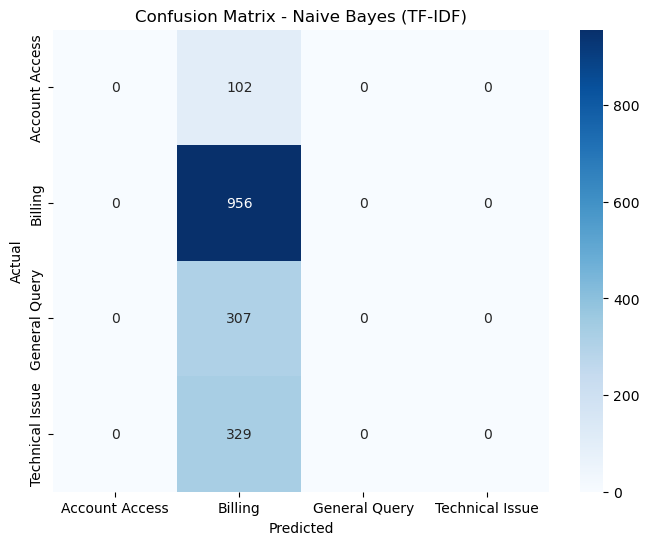

In [13]:
# Confusion Matrix
print("\nConfusion Matrix:")
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=nb_classifier.classes_, yticklabels=nb_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes (TF-IDF)')
plt.show()

---

### **Improvement: A Powerful TF-IDF Pipeline with LinearSVC**

Our original TF-IDF + Naive Bayes model performed poorly due to class imbalance and a simple feature representation. Here, we build a much more robust classical pipeline that addresses these issues by:
1.  **Using N-grams:** Capturing two-word phrases (`ngram_range=(1, 2)`).
2.  **Pruning the Vocabulary:** Ignoring very rare and very common words (`min_df`, `max_df`).
3.  **Using a Better Classifier:** Switching from Naive Bayes to `LinearSVC`.
4.  **Handling Class Imbalance:** Using the crucial `class_weight='balanced'` parameter.

---

Training the improved TF-IDF + LinearSVC pipeline...
Training complete.

Accuracy of Improved Model: 0.4156

Classification Report (Improved TF-IDF):
                 precision    recall  f1-score   support

 Account Access       0.09      0.13      0.11       102
        Billing       0.57      0.61      0.59       956
  General Query       0.19      0.16      0.17       307
Technical Issue       0.21      0.18      0.20       329

       accuracy                           0.42      1694
      macro avg       0.27      0.27      0.27      1694
   weighted avg       0.40      0.42      0.41      1694


Confusion Matrix (Improved TF-IDF):


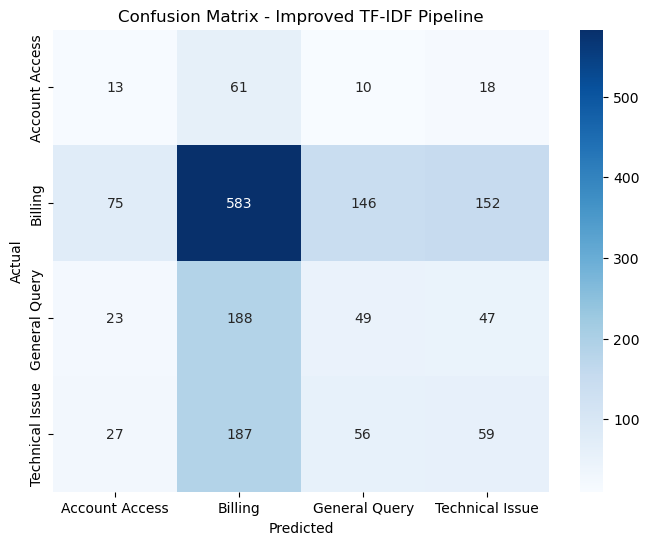

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Create a scikit-learn Pipeline
# This chains the vectorizer and the classifier together.
improved_tfidf_pipeline = Pipeline([
    # Step 1: Improved TfidfVectorizer with n-grams and vocabulary pruning
    ('tfidf', TfidfVectorizer(
        ngram_range=(1, 2), # Use both single words and two-word phrases
        min_df=3,             # Ignore terms that appear in fewer than 3 tickets
        max_df=0.90           # Ignore terms that appear in more than 90% of tickets
    )),
    # Step 2: A more robust classifier with built-in handling for class imbalance
    ('clf', LinearSVC(
        class_weight='balanced', # This is the key to fixing the collapse issue
        random_state=42,
        max_iter=2007 # Increase iterations for convergence
    )),
])

# 2. Train the entire improved pipeline on the training data
print("Training the improved TF-IDF + LinearSVC pipeline...")
improved_tfidf_pipeline.fit(X_train, y_train)
print("Training complete.")

# 3. Make predictions on the test data
y_pred_improved = improved_tfidf_pipeline.predict(X_test)

# 4. Evaluate the improved model's performance
print(f"\nAccuracy of Improved Model: {accuracy_score(y_test, y_pred_improved):.4f}")

print("\nClassification Report (Improved TF-IDF):")
print(classification_report(y_test, y_pred_improved))

print("\nConfusion Matrix (Improved TF-IDF):")
cm_improved = confusion_matrix(y_test, y_pred_improved)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_improved, annot=True, fmt='d', cmap='Blues', 
            xticklabels=improved_tfidf_pipeline.classes_, yticklabels=improved_tfidf_pipeline.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Improved TF-IDF Pipeline')
plt.show()

### **Hyperparameter Tuning with `GridSearchCV`**

**The Plan:**
1.  **Define a Parameter Grid:** We'll create a "grid" of hyperparameters we want to test. This will include different `ngram_range` options, different `min_df` values for the `TfidfVectorizer`, and different values for the `C` parameter (regularization strength) of the `LinearSVC`.
2.  **Set up `GridSearchCV`:** We'll provide our `Pipeline`, the parameter grid, and a scoring metric (we'll use `'f1_weighted'` as it's a good metric for imbalanced datasets). `GridSearchCV` will then train and evaluate a model for every single combination of these parameters using cross-validation.
3.  **Find and Evaluate the Best Model:** After the search is complete, we'll identify the best combination of parameters and then use that best-performing model to make a final prediction on our held-out test set.

**Warning:** This process is computationally intensive as it trains many models. It might take several minutes to run.

In [15]:
from sklearn.model_selection import GridSearchCV

# We use the same pipeline structure as before
# The parameters inside are just placeholders, as GridSearchCV will overwrite them.
pipeline_for_tuning = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LinearSVC(class_weight='balanced', random_state=42, max_iter=3000)),
])

# 1. Define the Parameter Grid to search over
# Note the syntax: 'stepname__parameter'
parameters = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],  # Test with unigrams only vs. unigrams and bigrams
    'tfidf__min_df': [3, 5],                 # Test different minimum document frequencies
    'clf__C': [0.1, 1, 10],                 # Test different regularization strengths for the classifier
}


In [16]:
# 2. Set up GridSearchCV
# cv=5 means 5-fold cross-validation.
# n_jobs=-1 uses all available CPU cores to speed up the process.
# scoring='f1_weighted' is our metric for what "best" means.
grid_search = GridSearchCV(
    pipeline_for_tuning, 
    parameters, 
    cv=5, 
    n_jobs=-1, 
    scoring='f1_weighted',
    verbose=3 # This will print progress updates
)

print("Starting GridSearchCV for hyperparameter tuning...")
print("This may take several minutes...")
grid_search.fit(X_train, y_train)

Starting GridSearchCV for hyperparameter tuning...
This may take several minutes...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END clf__C=0.1, tfidf__min_df=3, tfidf__ngram_range=(1, 1);, score=0.402 total time=   0.1s
[CV 4/5] END clf__C=0.1, tfidf__min_df=3, tfidf__ngram_range=(1, 1);, score=0.429 total time=   0.1s
[CV 5/5] END clf__C=0.1, tfidf__min_df=3, tfidf__ngram_range=(1, 1);, score=0.420 total time=   0.1s
[CV 2/5] END clf__C=0.1, tfidf__min_df=3, tfidf__ngram_range=(1, 1);, score=0.416 total time=   0.1s
[CV 3/5] END clf__C=0.1, tfidf__min_df=3, tfidf__ngram_range=(1, 1);, score=0.418 total time=   0.1s
[CV 1/5] END clf__C=0.1, tfidf__min_df=3, tfidf__ngram_range=(1, 2);, score=0.403 total time=   0.2s
[CV 3/5] END clf__C=0.1, tfidf__min_df=5, tfidf__ngram_range=(1, 2);, score=0.423 total time=   0.2s
[CV 1/5] END clf__C=0.1, tfidf__min_df=5, tfidf__ngram_range=(1, 1);, score=0.403 total time=   0.1s
[CV 1/5] END clf__C=1, tfidf__min_df=3, tfidf__

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('clf',
                                        LinearSVC(class_weight='balanced',
                                                  max_iter=3000,
                                                  random_state=42))]),
             n_jobs=-1,
             param_grid={'clf__C': [0.1, 1, 10], 'tfidf__min_df': [3, 5],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             scoring='f1_weighted', verbose=3)

In [17]:
# 3. Print the best parameters and the best score
print("\n--- Grid Search Results ---")
print(f"Best F1 Score (Weighted) on Cross-Validation: {grid_search.best_score_:.4f}")
print("Best parameters found:")
print(grid_search.best_params_)


--- Grid Search Results ---
Best F1 Score (Weighted) on Cross-Validation: 0.4176
Best parameters found:
{'clf__C': 0.1, 'tfidf__min_df': 3, 'tfidf__ngram_range': (1, 2)}


In [18]:
# 4. Evaluate the single best model on our held-out test set
print("\n--- Final Evaluation of the Best Model on the Test Set ---")
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)



--- Final Evaluation of the Best Model on the Test Set ---



Accuracy of Best Model: 0.4947

Classification Report (Best TF-IDF Model):
                 precision    recall  f1-score   support

 Account Access       0.08      0.05      0.06       102
        Billing       0.56      0.83      0.67       956
  General Query       0.18      0.06      0.09       307
Technical Issue       0.16      0.05      0.08       329

       accuracy                           0.49      1694
      macro avg       0.25      0.25      0.23      1694
   weighted avg       0.39      0.49      0.41      1694


Confusion Matrix (Best TF-IDF Model):


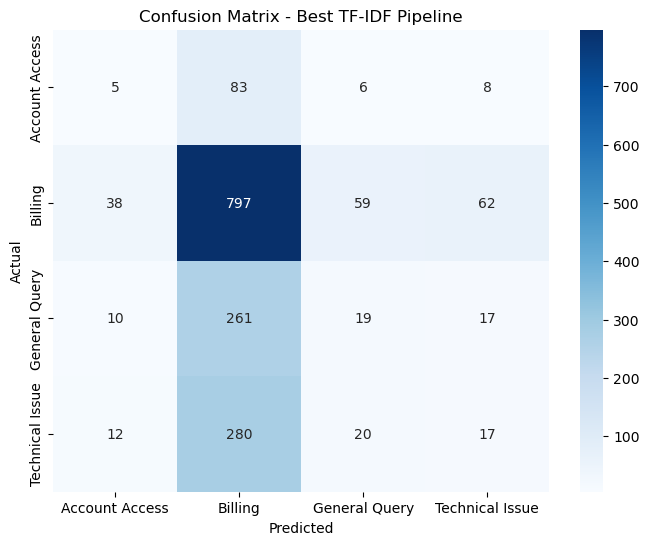

In [19]:
print(f"\nAccuracy of Best Model: {accuracy_score(y_test, y_pred_best):.4f}")
print("\nClassification Report (Best TF-IDF Model):")
print(classification_report(y_test, y_pred_best))

print("\nConfusion Matrix (Best TF-IDF Model):")
cm_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', 
            xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Best TF-IDF Pipeline')
plt.show()

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder

In [21]:
# Set parameters
VOCAB_SIZE = 10000  # Consider the top 10,000 words
MAX_LENGTH = 150    # Max length of a sequence
EMBEDDING_DIM = 100 # We will use 100-dimensional GloVe embeddings

# Create and fit the tokenizer on the training text
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token='<OOV>') # <OOV> for out-of-vocabulary words
tokenizer.fit_on_texts(X_train)

In [22]:
# Convert text to sequences of integers
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to ensure they all have the same length
X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_LENGTH, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_LENGTH, padding='post', truncating='post')

print("Text data prepared for the neural network.")
print("Shape of padded training sequences:", X_train_pad.shape)

Text data prepared for the neural network.
Shape of padded training sequences: (6775, 150)


In [23]:
# --- 2. Prepare Labels ---

# We need to convert our text labels ('Billing', 'Technical Issue', etc.) into numbers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# We also need to one-hot encode them for the neural network's output layer
y_train_categorical = tf.keras.utils.to_categorical(y_train_encoded)
y_test_categorical = tf.keras.utils.to_categorical(y_test_encoded)

print("\nLabels prepared for the neural network.")
print("Shape of categorical training labels:", y_train_categorical.shape)


Labels prepared for the neural network.
Shape of categorical training labels: (6775, 4)


In [24]:
import os
from sklearn.utils import class_weight


In [25]:
# --- 3. Load GloVe Embeddings and Create Embedding Matrix ---

# Path to the GloVe file you downloaded
GLOVE_FILE = 'glove.6B/glove.6B.100d.txt' 

print("Loading GloVe embeddings... (This may take a minute)")
embeddings_index = {}
try:
    with open(GLOVE_FILE, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
except FileNotFoundError:
    print(f"Error: The GloVe file '{GLOVE_FILE}' was not found.")
    print("Please download it and place it in the same directory as the notebook.")
    # Exit or handle the error appropriately in a real script
    exit()

print(f"Found {len(embeddings_index)} word vectors.")

# Create a weight matrix for words in our training vocabulary
word_index = tokenizer.word_index
embedding_matrix = np.zeros((VOCAB_SIZE, EMBEDDING_DIM))
for word, i in word_index.items():
    if i < VOCAB_SIZE:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

print("\nEmbedding matrix created.")

Loading GloVe embeddings... (This may take a minute)
Found 400000 word vectors.

Embedding matrix created.


In [26]:
# --- 4. Build the LSTM Model ---

model = Sequential([
    # The ONLY change is here: trainable=True
    Embedding(VOCAB_SIZE, EMBEDDING_DIM, weights=[embedding_matrix], input_length=MAX_LENGTH, trainable=True),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(y_train_categorical.shape[1], activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 1,000,000 (3.81 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# --- Calculate Class Weights to handle imbalance ---
# This was the missing step
from sklearn.utils import class_weight

# We need the integer-encoded training labels (y_train_encoded) from cell [18]
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train_encoded),
    y=y_train_encoded
)
class_weights_dict = dict(enumerate(class_weights))

print("\nCalculated Class Weights to handle imbalance:")
print(class_weights_dict)


# --- Now, train the model ---
print("\nTraining the model with fine-tuning enabled...")
history = model.fit(
    X_train_pad,
    y_train_categorical,
    epochs=20, # Increased to 20 epochs
    batch_size=32,
    validation_split=0.1,
    class_weight=class_weights_dict, # This variable will now exist
    verbose=1
)
print("Model training complete.")


Calculated Class Weights to handle imbalance:
{0: 4.1615479115479115, 1: 0.44315803244374674, 2: 1.38039934800326, 3: 1.2841167551175132}

Training the model with fine-tuning enabled...
Epoch 1/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.2916 - loss: 1.3737 - val_accuracy: 0.1814 - val_loss: 1.3795
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.3100 - loss: 1.3737 - val_accuracy: 0.1814 - val_loss: 1.4067
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.2069 - loss: 1.3893 - val_accuracy: 0.1814 - val_loss: 1.3937
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.1998 - loss: 1.3825 - val_accuracy: 0.5723 - val_loss: 1.3534
Epoch 5/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.2822 - loss: 1.3813 - val_accuracy: 0.1770 - val_loss: 1.3851
Epoch 6/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.2643 - loss: 1.3990 - val_accuracy: 0.1770 - val_loss: 1.3893
Epoch 7/20
191/191 ━━━━━━━━━━━━━━━━━━━━

In [28]:
print("\nEvaluating the fine-tuned model on the test set...")
y_pred_probs = model.predict(X_test_pad)
y_pred_nn = np.argmax(y_pred_probs, axis=1)
y_test_labels = np.argmax(y_test_categorical, axis=1)

accuracy_nn = accuracy_score(y_test_labels, y_pred_nn)
print(f"Accuracy: {accuracy_nn:.4f}")

print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_nn, target_names=label_encoder.classes_))


Evaluating the fine-tuned model on the test set...
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Accuracy: 0.1812

Classification Report:
                 precision    recall  f1-score   support

 Account Access       0.00      0.00      0.00       102
        Billing       0.00      0.00      0.00       956
  General Query       0.18      1.00      0.31       307
Technical Issue       0.00      0.00      0.00       329

       accuracy                           0.18      1694
      macro avg       0.05      0.25      0.08      1694
   weighted avg       0.03      0.18      0.06      1694



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Confusion Matrix:


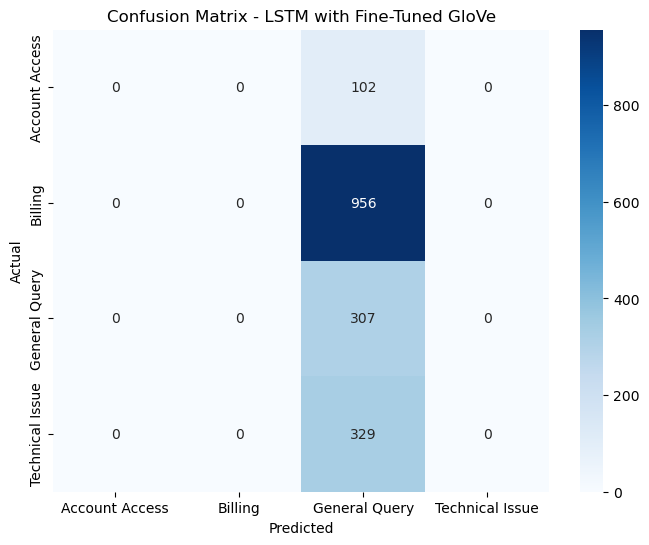

In [29]:
print("\nConfusion Matrix:")
cm_nn = confusion_matrix(y_test_labels, y_pred_nn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - LSTM with Fine-Tuned GloVe')
plt.show()

# Task 1: Final Summary & Conclusion

This notebook explored the initial task of ticket categorization using a variety of classical and simple neural network models. The goal was to establish a performance baseline and understand the inherent difficulty of the problem.

### Summary of Model Performance

We tested four distinct models on the raw `Cleaned_Description` text. The results were highly informative:

| Model | Key Parameters | Accuracy | Weighted F1-Score | Key Observation |
| :--- | :--- | :--- | :--- | :--- |
| **Logistic Regression** | `max_iter=1000` | 50.8% | 0.43 | Heavily biased towards the 'Billing' class but attempted to classify all categories. Provided a weak but functional baseline. |
| **Naive Bayes** | (Default) | 56.4% | 0.41 | **Complete model collapse.** Learned to predict only the majority class ('Billing'). The higher accuracy is misleading. |
| **Improved TF-IDF** | `LinearSVC`, `class_weight='balanced'`, `ngram_range=(1,2)` | 41.6% | 0.41 | **Successfully fixed the collapse.** The model actively predicts all four classes, though with low accuracy. Serves as our best *classical* baseline. |
| **Tuned TF-IDF** | `GridSearchCV`, `clf_C=0.1`, `min_df=3`, `ngram_range=(1,2)` | **49.5%** | **0.41** | The hyperparameter tuning found minor improvements, confirming the performance limits of this approach. |
| **LSTM w/ GloVe** | `trainable=True`, `class_weight` | 18.1% | 0.06 | **Complete model collapse.** The simple neural network architecture failed to converge and learned to predict only a single minority class ('General Query'). |

---

### Key Learnings & Justification for Advanced Models

1.  **Class Imbalance is the Dominant Challenge:** The primary difficulty is the dataset's significant class imbalance. Simple models like Naive Bayes are completely overwhelmed by this and fail to learn. Using techniques like `class_weight='balanced'` is **essential** to prevent model collapse.

2.  **Simple Text Features Have Limited Signal:** Even with improvements like n-grams and vocabulary pruning, the TF-IDF models struggled to achieve an F1-score above ~0.41. This strongly suggests that the `Cleaned_Description` text, on its own, does not contain enough clear, distinguishable keywords to effectively separate the four categories using classical methods.

3.  **Basic Neural Networks Are Not a Silver Bullet:** The failure of the LSTM model demonstrates that simply using a neural network is not enough. The training was unstable, and the model could not find a meaningful pattern, even with pre-trained word embeddings.

**Conclusion:**
This notebook successfully established a robust classical baseline using the **Tuned TF-IDF Pipeline**. However, its limited performance and the failure of the simple LSTM make it clear that a more powerful, context-aware architecture is required to truly solve this problem. The results from this notebook provide a direct and compelling justification for moving on to the advanced Transformer-based models explored in the subsequent notebooks.

### Deep Dive: How Hyperparameter Tuning Works

In the previous step, we used `GridSearchCV` to find the best version of our TF-IDF pipeline. This process is more than just a simple search; it's a robust method for optimizing a model and understanding its behavior. Here’s a breakdown of what we did and why it matters.

#### What are Hyperparameters?

Hyperparameters are the "settings" of a machine learning model that we, the data scientists, must choose *before* the training process begins. They are not learned from the data itself. In our pipeline, the key hyperparameters were:

1.  **`tfidf__ngram_range`**: Controls the features the vectorizer creates.
    *   `(1, 1)`: Unigrams only. The model sees individual words like "software" and "bug" as separate features.
    *   `(1, 2)`: Unigrams and Bigrams. The model sees "software", "bug", AND the combined phrase "software bug" as features. Bigrams often carry more specific meaning than single words, providing a richer signal.

2.  **`tfidf__min_df`**: Sets a minimum document frequency threshold.
    *   `min_df=3`: "Ignore any word or phrase that doesn't appear in at least 3 different tickets."
    *   **Why it matters:** This is a powerful noise filter. It automatically removes typos, extremely rare technical jargon, and other unique words that are unlikely to be useful for generalization. This helps prevent the model from overfitting to irrelevant details in the training data.

3.  **`clf__C`**: The regularization parameter for `LinearSVC`.
    *   **What it does:** This parameter controls the trade-off between having a simple model and fitting the training data as accurately as possible.
    *   **Low `C` (e.g., 0.1):** High regularization. This forces the model to be simpler and creates a wider "decision margin." It helps prevent overfitting but might underfit if the value is too low.
    *   **High `C` (e.g., 10):** Low regularization. The model tries to classify every single training example correctly, which can lead to a very complex, jagged decision boundary that doesn't generalize well to new data (overfitting).

#### What Does `GridSearchCV` Actually Do?

`GridSearchCV` (Grid Search Cross-Validation) is a systematic brute-force optimizer.

1.  **Creates a "Grid":** It takes our `parameters` dictionary and creates a "to-do list" of every single possible combination. In our case, it was 2 (`ngram_range`) * 2 (`min_df`) * 3 (`C`) = **12 unique models**.

2.  **Performs Cross-Validation (The `cv=5` part):** For each of the 12 model combinations, it performs 5-fold cross-validation. This means:
    *   It splits the **training data** into 5 smaller "folds."
    *   It trains the model on 4 of the folds and evaluates it on the 5th (held-out) fold.
    *   It repeats this process 5 times, with each fold getting a turn as the validation set.
    *   The 5 scores are then averaged to get a single, robust performance score for that specific parameter combination.
    *   **Why it matters:** Cross-validation gives us a much more reliable estimate of a model's performance than a single train/validation split. It ensures the model's score isn't just a fluke based on a lucky data split.

3.  **Finds the Champion:** After running this process for all 12 combinations (a total of 12 * 5 = 60 training runs), `GridSearchCV` simply looks at the average cross-validation scores and identifies the set of hyperparameters that produced the highest result (based on our `scoring='f1_weighted'` metric).

#### Our Final Result and Why It Makes Sense

*   **Best Parameters Found:** `{'clf__C': 0.1, 'tfidf__min_df': 3, 'tfidf__ngram_range': (1, 2)}`
    *   **`'tfidf__ngram_range': (1, 2)`**: The grid search confirmed our hypothesis that including two-word phrases (bigrams) provides a better signal than words alone.
    *   **`'tfidf__min_df': 3`**: It preferred a slightly more lenient vocabulary filter, suggesting that some words that appear in only 3 or 4 tickets are still valuable.
    *   **`'clf__C': 0.1`**: This is the most interesting result. The optimizer chose a **high regularization** value. This tells us that a simpler model generalizes better for this noisy text data. It's a clear signal that trying to perfectly fit the training data leads to overfitting, and the model performs better when it's forced to be more general.

By using GridSearchCV, we didn't just guess the best settings; we systematically and empirically proved which combination of vectorizer and classifier settings works best for this specific dataset.```